<a href="https://colab.research.google.com/github/path-0f-misantrope/most_uselles_musor2/blob/main/baselane1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder



In [2]:
df = pd.read_csv("/content/train.csv")
df.info()
df.shape


<ipython-input-2-412c2cb385a2>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650,1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


(14456, 2666)

In [3]:
df.drop_duplicates()
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_columns)
df = df.T.drop_duplicates().T




<Axes: >

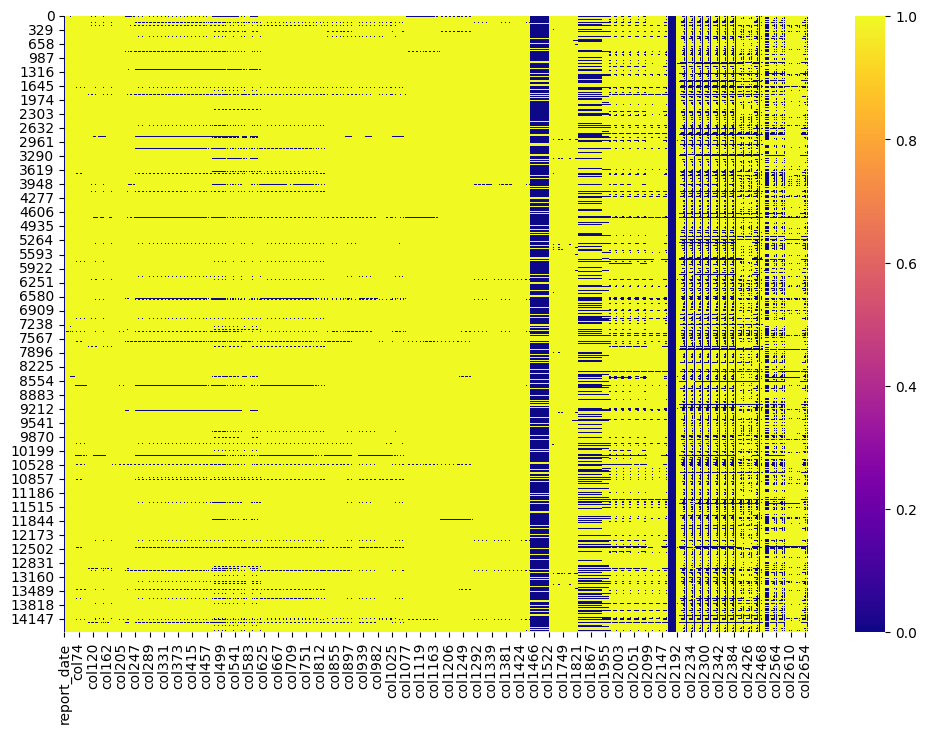

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='plasma')


In [5]:
threshold = 0.70 * len(df)  # Определяем пороговое значение
df_filtered = df.loc[:, df.notnull().sum() >= threshold]  # Фильтруем колонки
threshold_col = 0.20 * len(df.columns)  # Определяем пороговое значение
df_filtered = df[df.notnull().sum(axis=1) >= threshold_col] # Фильтруем строки


In [6]:

print(df_filtered.shape)

(1335, 2194)


In [7]:
df_filtered.head(10)


,report_date,client_id,target,col1,col2,col3,col4,col7,col8,col27,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
11,2022-12-01,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5300000.0,5065000.0,5182500.0,NaN,NaN,NaN,5300000.0,5065000.0,5182500.0,0.258209
22,2022-10-01,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,0.257017
23,2022-12-01,34,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,0.257698
35,2022-11-01,47,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6775538.0,6775538.0,6775538.0,NaN,NaN,NaN,6775538.0,6775538.0,6775538.0,0.25824
36,2023-01-01,48,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5780000.0,5780000.0,5780000.0,NaN,NaN,NaN,5780000.0,5780000.0,5780000.0,0.255107
39,2022-08-01,51,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
43,2023-02-01,55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17780000.0,17780000.0,17780000.0,NaN,NaN,NaN,17780000.0,17780000.0,17780000.0,0.32008
66,2023-02-01,102,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7701000.0,7701000.0,7701000.0,NaN,NaN,NaN,7701000.0,7701000.0,7701000.0,0.271527


In [8]:
df_filtered.head(12)

,report_date,client_id,target,col1,col2,col3,col4,col7,col8,col27,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
11,2022-12-01,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5300000.0,5065000.0,5182500.0,NaN,NaN,NaN,5300000.0,5065000.0,5182500.0,0.258209
22,2022-10-01,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,8284916.0,0.257017
23,2022-12-01,34,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,9147105.0,0.257698
35,2022-11-01,47,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6775538.0,6775538.0,6775538.0,NaN,NaN,NaN,6775538.0,6775538.0,6775538.0,0.25824
36,2023-01-01,48,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5780000.0,5780000.0,5780000.0,NaN,NaN,NaN,5780000.0,5780000.0,5780000.0,0.255107
39,2022-08-01,51,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
43,2023-02-01,55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17780000.0,17780000.0,17780000.0,NaN,NaN,NaN,17780000.0,17780000.0,17780000.0,0.32008
66,2023-02-01,102,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7701000.0,7701000.0,7701000.0,NaN,NaN,NaN,7701000.0,7701000.0,7701000.0,0.271527


In [9]:
categorical_columns = df_filtered.select_dtypes(include=['object']).columns.tolist()
df_filtered.fillna(0, inplace=True)
print(df_filtered[categorical_columns].dtypes)




report_date     object
client_id        int64
target           int64
col1           float64
col2           float64
                ...   
col2659        float64
col2660        float64
col2661        float64
col2662        float64
col2663        float64
Length: 2194, dtype: object


<ipython-input-9-437258255b87>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.fillna(0, inplace=True)
<ipython-input-9-437258255b87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


In [10]:
df_filtered.drop(['col1454'], axis = 1, inplace = True) # там хэши какие то говно
df_filtered.drop(['report_date'], axis = 1, inplace = True) # удаляю дату потому что могу

<ipython-input-10-ab3a342d7444>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['col1454'], axis = 1, inplace = True) # там хэши какие то говно
<ipython-input-10-ab3a342d7444>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['report_date'], axis = 1, inplace = True) # удаляю дату потому что могу


In [35]:
ordinal_encoder = OrdinalEncoder()
categorical_columns = df_filtered.select_dtypes(include=['object']).columns.tolist()

print(df_filtered[categorical_columns[225]].unique())


[0 'Moscow' 'St.-Petersburg' 'Voronezh Oblast' 'Khanty-Mansia'
 'Irkutsk Oblast' 'Barcelona' 'Khabarovsk' 'Volgograd Oblast'
 'Khakasiya Republic' 'Belgorod Oblast' 'Sverdlovsk Oblast'
 'Bashkortostan Republic' 'Tatarstan Republic' 'Chelyabinsk Oblast'
 'Krasnodarskiy Kray' 'Sakhalin Oblast' 'Leningrad Oblast'
 'Arkhangelskaya' 'Tula Oblast' 'Mazovia' 'Transbaikal Territory'
 'Krasnoyarskiy Kray' 'Minsk City' 'Yamalo-Nenets' 'Yaroslavl Oblast'
 'Kemerovo Oblast' 'Udmurtiya Republic' 'Krasnodar Krai' 'Budva'
 'Moscow Oblast' 'Novosibirsk Oblast' 'Tyumen Oblast' 'Rostov Oblast'
 'Podgorica' 'Samara Oblast' 'Murmansk' 'Kaliningrad Oblast' 'Tver Oblast'
 'Nizhny Novgorod Oblast' 'Stockholm County' 'Orenburg Oblast'
 'Primorskiy (Maritime) Kray' 'Magadan Oblast' 'Sakha' 'Tallinn'
 'Altai Krai' 'Yerevan' 'South Holland' 'Nonthaburi' 'Komi' 'Paris'
 'Malaga' "Vladimirskaya Oblast'" 'Tver’ Oblast' 'Perm Krai'
 'Kirov Oblast' 'Stavropol Kray' 'Saratovskaya Oblast' 'Tokyo'
 'Lipetsk Oblast' 'Amu

In [37]:
print(df_filtered[categorical_columns[22]].info())

<class 'pandas.core.series.Series'>
Index: 1335 entries, 3 to 14446
Series name: col96
Non-Null Count  Dtype 
--------------  ----- 
1335 non-null   object
dtypes: object(1)
memory usage: 53.1+ KB
None


In [23]:
df_filtered.drop([categorical_columns[4]], axis = 1, inplace = True)#сcылки удалил несколько меня число в этой строке


<ipython-input-23-6e878954faa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop([categorical_columns[4]], axis = 1, inplace = True)#сcылки


In [38]:
df_filtered[categorical_columns] = df_filtered[categorical_columns].astype(str)

<ipython-input-38-4c691af51037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[categorical_columns] = df_filtered[categorical_columns].astype(str)


In [43]:
categorical_columns = df_filtered.select_dtypes(include=['object']).columns.tolist()

ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df_filtered[categorical_columns])
df_filtered[categorical_columns] = encoded_data.astype(int)


<ipython-input-43-f770fdbf80c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[categorical_columns] = encoded_data.astype(int)


In [44]:
X = df_filtered.drop('target', axis=1)
y = df_filtered['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_probs = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# Оценка AUC-ROC
auc_roc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.7085099939430648
